In [37]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def preprocessing_data(input_file):
    def is_numeric(value):
        try:
            float(value)
            return True
        except ValueError:
            return False
    output_file = f'preprocessed_{input_file}'
    with open(input_file, 'r') as f_in:
        reader = csv.reader(f_in)
        cleaned_rows = []
        for row in reader:
            cleaned_row = [cell for cell in row if is_numeric(cell)]
            if cleaned_row:
                cleaned_rows.append(cleaned_row)
    with open(output_file, 'w', newline='') as f_out:
        writer = csv.writer(f_out)
        writer.writerows(cleaned_rows)
    print(f"Filtered CSV data has been written to {output_file}")
    return output_file

Filtered CSV data has been written to result_4.csv


In [51]:
col = ["num_cluster", "num_callgraph", "depth", "fanout", "num_cluster2", "num_svc", "num_endpoint", "solver_time"]
df = pd.read_csv("result_4.csv", names=col)
df = df.sort_values(by=['num_svc', 'num_endpoint', 'num_cluster', 'num_callgraph'])
df.reset_index(drop=True, inplace=True)
df

SyntaxError: unterminated string literal (detected at line 1) (1860156148.py, line 1)

In [62]:
def parse_and_plot(fn, fanout, num_callgraph, xaxis):
    col = ["num_cluster2", "num_callgraph", "depth", "fanout", "num_cluster", "num_svc", "num_endpoint", "solver_time"]
    df = pd.read_csv(fn, names=col)
    df = df[df["fanout"]==fanout]
    df = df[df["num_callgraph"]==num_callgraph]
    display(df)
    df_sorted = df.sort_values(by=['num_svc', 'num_endpoint', 'num_cluster', 'num_callgraph'])
    df_sorted.reset_index(drop=True, inplace=True)
    clusters = df_sorted["num_cluster"].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(clusters)))
    # plt.figure(figsize=(10, 7))
    for color, cluster in zip(colors, clusters):
        cluster_data = df_sorted[df_sorted["num_cluster"] == cluster]
        plt.scatter(cluster_data[xaxis], cluster_data["solver_time"], color=color, alpha=0.6, label=f'Cluster {cluster}')
    plt.xlabel(xaxis, fontsize=18)
    plt.ylabel("Solver Time", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend()  # Display the legend to distinguish clusters
    plt.show()

,num_cluster2,num_callgraph,depth,fanout,num_cluster,num_svc,num_endpoint,solver_time
54,2,4,2,3,2,13,16,0.270559
56,2,4,3,3,2,25,28,1.083794
58,2,4,4,3,2,37,40,6.334904
60,2,4,5,3,2,49,52,6.600264
62,2,4,6,3,2,61,64,7.786351
64,2,4,7,3,2,73,76,11.843237
66,2,4,8,3,2,85,88,15.039544
68,2,4,9,3,2,97,100,16.889269
70,2,4,10,3,2,109,112,16.952025
126,3,4,2,3,3,13,16,0.611112


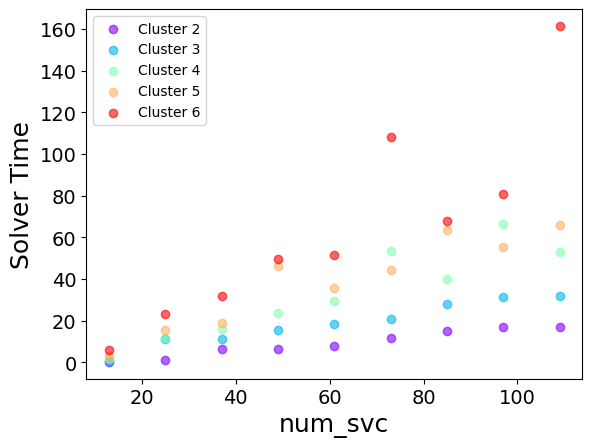

,num_cluster2,num_callgraph,depth,fanout,num_cluster,num_svc,num_endpoint,solver_time
54,2,4,2,3,2,13,16,0.270559
56,2,4,3,3,2,25,28,1.083794
58,2,4,4,3,2,37,40,6.334904
60,2,4,5,3,2,49,52,6.600264
62,2,4,6,3,2,61,64,7.786351
64,2,4,7,3,2,73,76,11.843237
66,2,4,8,3,2,85,88,15.039544
68,2,4,9,3,2,97,100,16.889269
70,2,4,10,3,2,109,112,16.952025
126,3,4,2,3,3,13,16,0.611112


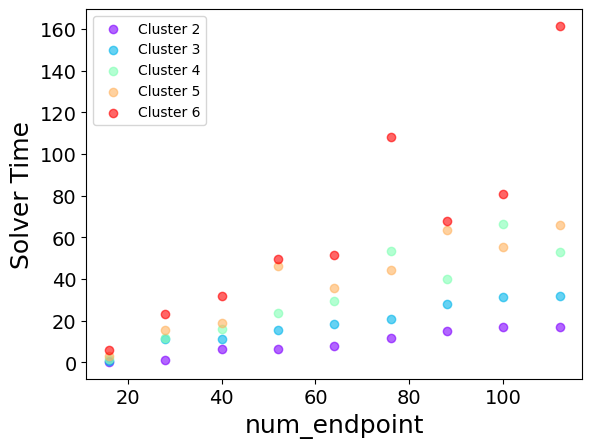

In [63]:
fn="result_4.csv"
# parse_and_plot(fn, fanout=3, num_callgraph=4, xaxis="num_svc")
# parse_and_plot(fn, fanout=3, num_callgraph=2, xaxis="num_svc")
# parse_and_plot(fn, fanout=3, num_callgraph=1, xaxis="num_svc")
parse_and_plot(fn, fanout=3, num_callgraph=4, xaxis="num_endpoint")
parse_and_plot(fn, fanout=3, num_callgraph=2, xaxis="num_endpoint")
parse_and_plot(fn, fanout=3, num_callgraph=1, xaxis="num_endpoint")